# Examples how to plot maps of sea ice fields from SI3 simulation

Last update: 2024-11-27

The first example (PLOT 1 below) is an example where all the commands are called in the same block. The second example (PLOT 2) shows how i've put most of it in functions and then just call the functions.

In [1]:
## standart libraries
import os,sys
import sys

import numpy as np
from scipy import stats

# xarray
import xarray as xr

# plot
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches
from matplotlib import animation
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

import copy
import pandas as pd

from IPython.display import HTML

import cmocean

from ablikit import libablikit as li

# for jupyter notebook display
%matplotlib inline

Name: ablikit.libablikit
Package: ablikit
This is a collection of  tools i often use when analysing sea ice NEMO based outputs.


# READ

In [2]:
prefix="NANUK4_ICE_ABL-"

freq="1h"
diribase="/lustre/fsstor/projects/rech/cli/commun/NANUK4/"
dirigrid="/lustre/fsstor/projects/rech/cli/commun/NANUK4/NANUK4.L31-I/"

# grid file
mafi="mesh_mask_NANUK4_L31_4.2.nc"
meshmask = xr.open_dataset(dirigrid+mafi,decode_times=True)

In [3]:
namefiles = diribase+"NANUK4_ICE_ABL-ABLBBM903-S/*/NANUK4_ICE_ABL-ABLBBM903_1h_*_icemod.nc"
datice = xr.open_mfdataset(namefiles,decode_times=True)

In [4]:
datice.time_counter

<xarray.DataArray 'time_counter' (time_counter: 1920)>
array(['1997-01-11T00:30:00.000000000', '1997-01-11T01:30:00.000000000',
       '1997-01-11T02:30:00.000000000', ..., '1997-03-31T21:30:00.000000000',
       '1997-03-31T22:30:00.000000000', '1997-03-31T23:30:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(1176,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 1997-01-11T00:30:00 ... 1997...
Attributes:
    axis:           T
    standard_name:  time
    long_name:      Time axis
    time_origin:    1970-01-01 00:00:00
    bounds:         time_counter_bounds

# PLOT 1
without any functions

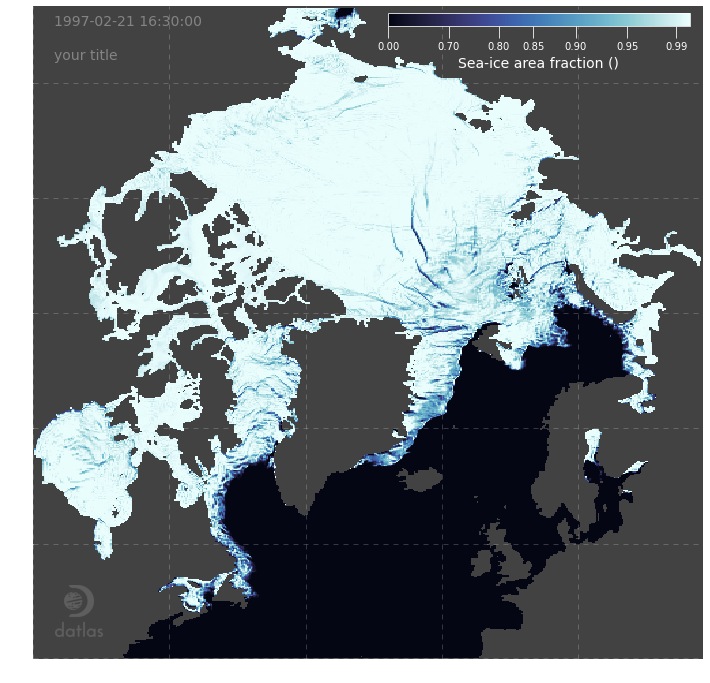

/gpfswork/rech/cli/regi915/PLT/2024-10/firstens/demo_1000.png


In [5]:
# where to save the plot
diro="/gpfswork/rech/cli/regi915/PLT/2024-10/firstens/"

# variable to plot
var2plt='siconc'

# time step at which to plot the data
it=1000   

# prepare colormap
vmin=0.
vmax=1
cblev=[0,0.7,0.8,0.85,0.9,0.95,0.99]
cmap = copy.copy(cmocean.cm.ice)
cmap.set_bad('r',1.)
cmap.set_under('k')
cmap.set_over('w')
# non linear:
norm = mcolors.PowerNorm(gamma=4.5,vmin=vmin, vmax=vmax)

# linear
#norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# prepare mask
mask = meshmask.tmask[0,0,:,:]
            
# get data to plot  and mask
data2plot = datice[var2plt].isel(time_counter=it).where(mask!=0)

# text label near colorbar (read it from data)
tlabel=datice[var2plt].long_name+" ("+datice[var2plt].units+")"

# text date to plot 
tdate=datice.time_counter.to_index()[it]

# plot title
titleplt="your title"

# main plot
fig1,(ax) = plt.subplots(1, 1, figsize=[12, 12],facecolor='w')
gridinc=100

# name of plot to output (index with time step)
namo="demo_"+str(it).zfill(3)  
        
# plot the data here
cs  = ax.pcolormesh(data2plot,cmap=cmap,norm=norm)

# some customization :

# Remove the plot frame lines. 
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  

# ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="off", labeltop='off',left="off", right="off", labelright="off",labelleft="off")  

# grid style
lstylegrid=(0, (5, 5)) 
cmap.set_bad('#424242')
lcolorgrid='w'#"#585858" # "#D8D8D8"
tcolorgrid='w'#'#848484'#"#848484"
  

lalpha=0.2
lwidthgrid=1.
        
ax.xaxis.set_major_locator(mticker.MultipleLocator(gridinc))
ax.yaxis.set_major_locator(mticker.MultipleLocator(gridinc))   
ax.tick_params(colors=tcolorgrid,which="both", bottom=True, top=False,  
                labelbottom=True, labeltop=False,left=True, right=False, labelright=False,labelleft=True)
ax.grid(which='major',linestyle=lstylegrid,color=lcolorgrid,alpha=lalpha,linewidth=lwidthgrid)
ax.axhline(y=1.,xmin=0, xmax=883,zorder=10,color=lcolorgrid,linewidth=lwidthgrid,linestyle=lstylegrid,alpha=lalpha )
    
                
# add date
tcolordate="#848484"
tsizedate=14
ax.annotate(tdate,xy=(15,550),xycoords='data', color=tcolordate,size=14)

# add title exp
ax.annotate(titleplt,xy=(15,520),xycoords='data', color=tcolordate,size=14)         

# add Datlas logo
logo=True
if logo:
    li.FaddDatlasLogo(fig1,alpha=0.15)
       
# add colorbar
cbar=True
if cbar:
    cb = li.Fpltcolorbar(fig1,ax,var2plt,norm,cmap,cblev,tlabel,textco='w')   

pltshow=True
if pltshow:
    plt.show()

pltsave=True
if pltsave:    
# Save fig in png, resolution dpi    
    li.Fsaveplt(fig1,diro,namo,dpifig=300)

# close plot
plt.close(fig1)


---
# PLOT 2 
(using some of my functions)

### read data

In [6]:
# list of experiments to consider
experiments = [
    {"frc": "ABL", "rheol": "BBM", "nb": "903", "loadice": True, "loadoce": False, "loadall": False},
    {"frc": "BLK", "rheol": "BBM", "nb": "903", "loadice": True, "loadoce": False, "loadall": False},
]

# Calling the function
experiment_datasets = li.Fload_experiments(experiments, diribase)

===== preapring to load experiment: ABLBBM903
Loading ice files : /lustre/fsstor/projects/rech/cli/commun/NANUK4/NANUK4_ICE_ABL-ABLBBM903-S/*/NANUK4_ICE_ABL-ABLBBM903_1h_*_icemod.nc
===== preapring to load experiment: BLKBBM903
Loading ice files : /lustre/fsstor/projects/rech/cli/commun/NANUK4/NANUK4_ICE_ABL-BLKBBM903-S/*/NANUK4_ICE_ABL-BLKBBM903_1h_*_icemod.nc


In [7]:
experiment_datasets.keys()

dict_keys(['ABLBBM903', 'BLKBBM903'])

# Plot siconc

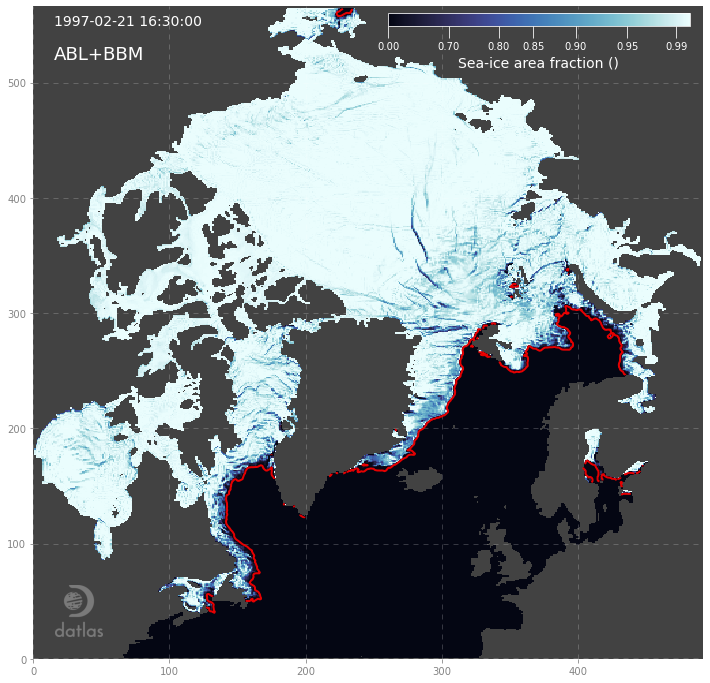

/gpfswork/rech/cli/regi915/PLT/2024-10/firstens/NANUK4_ICE_ABL-ABLBBM903_1h_siconc_1000.png


In [9]:
# color bar limit and ticks
vmin=0.
vmax=1.
cblev=[0]
it = 1000
fig1,ax,cs,cs2,cb = experiment_datasets['ABLBBM903'].Fplot('siconc',it,pltshow=True,diro=diro,cblev=cblev,pltsave=True,varty=1,sicol='r',vmax=vmax,vmin=vmin)

### Plot thickness

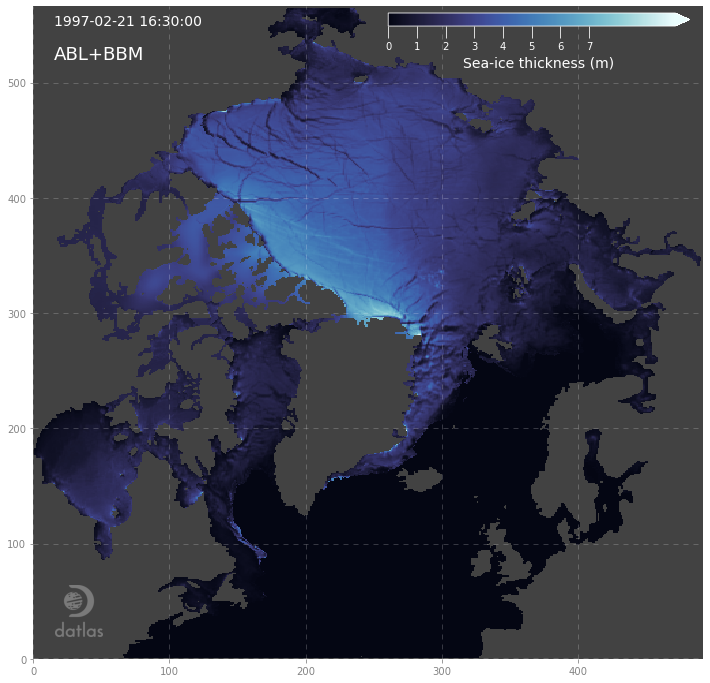

/gpfswork/rech/cli/regi915/PLT/2024-10/firstens/NANUK4_ICE_ABL-ABLBBM903_1h_sithic_1000.png


In [11]:
it = 1000
vmax=7
vmin=0

num_intervals = 7 
cblev = np.linspace(vmin, vmax, num_intervals + 1)

ALL = experiment_datasets['ABLBBM903'].Fplot('sithic',it,pltshow=True,diro=diro,cblev=cblev,maskoce=False,cmapforced=cmocean.cm.ice,pltsave=True,varty=1,threshmask=0.01)